<a href="https://colab.research.google.com/github/SalamUddin844/Bangladeshi-Political-Sentiment-analysis-NLP-/blob/main/NLP_first_project_(sentimental_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
twitter_data=[]

In [ ]:
payload={
    'api_key':'c24e37713ea68eb9748709273d9dff13',
    'query':'Bangladesh politics OR #BangladeshPolitics OR #BDPolitics OR Bangladesh AND politics',
    'num':'100',
    'lang': 'en',
}

response=requests.get(
    'https://api.scraperapi.com/structured/twitter/search',params=payload
)

data=response.json()

In [ ]:
data.keys()

dict_keys(['search_information', 'organic_results', 'pagination'])

In [ ]:
all_tweet=data['organic_results']
for i in all_tweet:
  twitter_data.append(i)

In [ ]:
dataframe=pd.DataFrame(twitter_data)
dataframe.to_json('tweets.json',orient='index')
print('coverted successfully')

coverted successfully


In [ ]:
dataframe

,position,title,snippet,highlighs,link,displayed_link
0,0,David Bergman (@TheDavidBergman) / X,"Writing on politics, elections, corruption, hu...","[politics, Bangladesh]",https://twitter.com/thedavidbergman,79.2K+ followers
1,1,Derek J. Grossman,Bangladeshi politics still smoldering. “The in...,"[Bangladeshi politics, government]",https://twitter.com/DerekJGrossman/status/1850...,80+ likes · 4 days ago
2,2,Michael Kugelman,What a misguided decision by Bangladesh's inte...,"[Bangladesh's, government, politics]",https://twitter.com/MichaelKugelman/status/184...,210+ likes · 1 week ago
3,3,Chris Blackburn,https://t.co/xFRCq9hcSl 'No place' for Hasina'...,"[Bangladesh's politics, Bangladesh]",https://twitter.com/CJBdingo25/status/18515887...,10+ likes · 20 hours ago
4,4,Vosa Tv (Official),Momentum builds in Bangladesh to remove Presid...,[Bangladesh],https://twitter.com/vosatvofficial/status/1851...,1 day ago
...,...,...,...,...,...,...
95,95,Sam Bidwell,Events in Bangladesh are having an increasingl...,"[Bangladesh, politics, Bangladeshi politics]",https://twitter.com/sam_bidwell/status/1848359...,840+ likes · 1 week ago
96,96,Michael Kugelman,It's more reluctant to get involved in domesti...,"[politics, Bangladesh]",https://twitter.com/MichaelKugelman/status/172...,290+ likes · 11 months ago
97,97,Toby Cadman (@tobycadman) / X,Bangladesh politics comes to Camden Council in...,[Bangladesh politics],https://twitter.com/tobycadman,13.2K+ followers
98,98,Mohammad A. Arafat (@MAarafat71) / ...,"Politician, Academic, Social activist, For pea...","[Politician, Bangladesh]",https://twitter.com/maarafat71,62.2K+ followers


In [ ]:
dataframe.to_csv('twitter_data.csv')

# **Sentiment Analysis**

# **Load dataset**

In [ ]:
df = pd.read_csv('/content/twitter_data.csv')
print(df.shape)
df.head()

(100, 7)


,Unnamed: 0,position,title,snippet,highlighs,link,displayed_link
0,0,0,David Bergman (@TheDavidBergman) / X,"Writing on politics, elections, corruption, hu...","['politics', 'Bangladesh']",https://twitter.com/thedavidbergman,79.2K+ followers
1,1,1,Derek J. Grossman,Bangladeshi politics still smoldering. “The in...,"['Bangladeshi politics', 'government']",https://twitter.com/DerekJGrossman/status/1850...,80+ likes · 4 days ago
2,2,2,Michael Kugelman,What a misguided decision by Bangladesh's inte...,"[""Bangladesh's"", 'government', 'politics']",https://twitter.com/MichaelKugelman/status/184...,210+ likes · 1 week ago
3,3,3,Chris Blackburn,https://t.co/xFRCq9hcSl 'No place' for Hasina'...,"[""Bangladesh's politics"", 'Bangladesh']",https://twitter.com/CJBdingo25/status/18515887...,10+ likes · 20 hours ago
4,4,4,Vosa Tv (Official),Momentum builds in Bangladesh to remove Presid...,['Bangladesh'],https://twitter.com/vosatvofficial/status/1851...,1 day ago


In [ ]:
example = df['snippet'][50]
print(example)

The #Bangladesh government has decided to waive tuition and fees for all students from government and private schools, colleges, madrasas, technical ...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['The',
 '#',
 'Bangladesh',
 'government',
 'has',
 'decided',
 'to',
 'waive',
 'tuition',
 'and']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('#', '#'),
 ('Bangladesh', 'JJ'),
 ('government', 'NN'),
 ('has', 'VBZ'),
 ('decided', 'VBN'),
 ('to', 'TO'),
 ('waive', 'VB'),
 ('tuition', 'NN'),
 ('and', 'CC')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  #/#
  (GPE Bangladesh/JJ)
  government/NN
  has/VBZ
  decided/VBN
  to/TO
  waive/VB
  tuition/NN
  and/CC
  fees/NNS
  for/IN
  all/DT
  students/NNS
  from/IN
  government/NN
  and/CC
  private/JJ
  schools/NNS
  ,/,
  colleges/NNS
  ,/,
  madrasas/NN
  ,/,
  technical/JJ
  .../:)


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
new=df['snippet'][70]
print(new)
sia.polarity_scores(new)

Bangladesh's politics are so vicious that neither side can trust the other to hold free and fair elections http://t.co/Q93v3668.


{'neg': 0.224, 'neu': 0.565, 'pos': 0.211, 'compound': -0.0883}

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['snippet']
    myid = row['position']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
res

{0: {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4588},
 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compound': -0.3818},
 3: {'neg': 0.105, 'neu': 0.766, 'pos': 0.129, 'compound': 0.128},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.7269},
 6: {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.4019},
 7: {'neg': 0.071, 'neu': 0.787, 'pos': 0.142, 'compound': 0.4215},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.6908},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'compound': -0.2057},
 13: {'neg': 0.266, 'neu': 0.557, 'pos': 0.176, 'compound': -0.5994},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 0.875, 'pos': 0.

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'position'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,position,neg,neu,pos,compound,Unnamed: 0,title,snippet,highlighs,link,displayed_link
0,0,0.000,0.875,0.125,0.4588,0,David Bergman (@TheDavidBergman) / X,"Writing on politics, elections, corruption, hu...","['politics', 'Bangladesh']",https://twitter.com/thedavidbergman,79.2K+ followers
1,1,0.000,1.000,0.000,0.0000,1,Derek J. Grossman,Bangladeshi politics still smoldering. “The in...,"['Bangladeshi politics', 'government']",https://twitter.com/DerekJGrossman/status/1850...,80+ likes · 4 days ago
2,2,0.120,0.880,0.000,-0.3818,2,Michael Kugelman,What a misguided decision by Bangladesh's inte...,"[""Bangladesh's"", 'government', 'politics']",https://twitter.com/MichaelKugelman/status/184...,210+ likes · 1 week ago
3,3,0.105,0.766,0.129,0.1280,3,Chris Blackburn,https://t.co/xFRCq9hcSl 'No place' for Hasina'...,"[""Bangladesh's politics"", 'Bangladesh']",https://twitter.com/CJBdingo25/status/18515887...,10+ likes · 20 hours ago
4,4,0.000,1.000,0.000,0.0000,4,Vosa Tv (Official),Momentum builds in Bangladesh to remove Presid...,['Bangladesh'],https://twitter.com/vosatvofficial/status/1851...,1 day ago


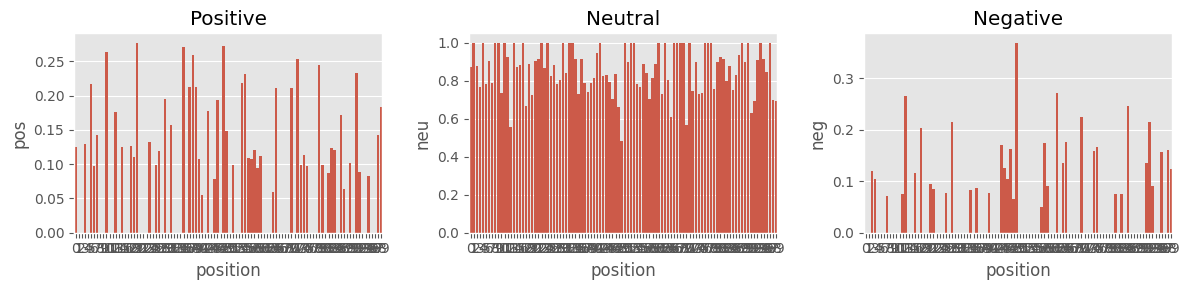

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='position', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='position', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='position', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


In [ ]:
print(vaders.columns)


Index(['position', 'neg', 'neu', 'pos', 'compound', 'Unnamed: 0', 'title',
       'snippet', 'highlighs', 'link', 'displayed_link'],
      dtype='object')


In [ ]:
print(vaders.head())


   position    neg    neu    pos  compound  Unnamed: 0  \
0         0  0.000  0.875  0.125    0.4588           0   
1         1  0.000  1.000  0.000    0.0000           1   
2         2  0.120  0.880  0.000   -0.3818           2   
3         3  0.105  0.766  0.129    0.1280           3   
4         4  0.000  1.000  0.000    0.0000           4   

                                  title  \
0  David Bergman (@TheDavidBergman) / X   
1                     Derek J. Grossman   
2                      Michael Kugelman   
3                       Chris Blackburn   
4                    Vosa Tv (Official)   

                                             snippet  \
0  Writing on politics, elections, corruption, hu...   
1  Bangladeshi politics still smoldering. “The in...   
2  What a misguided decision by Bangladesh's inte...   
3  https://t.co/xFRCq9hcSl 'No place' for Hasina'...   
4  Momentum builds in Bangladesh to remove Presid...   

                                    highlighs  \
0     